### Import necessary libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

In [4]:
# load the data
iris = pd.read_csv('Iris.csv')

### Explore the dataset

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


from matplotlib import pyplot as plt
_df_0['SepalLengthCm'].plot(kind='hist', bins=20, title='SepalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SepalWidthCm'].plot(kind='hist', bins=20, title='SepalWidthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PetalLengthCm'].plot(kind='hist', bins=20, title='PetalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SepalWidthCm', y='PetalLengthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PetalWidthCm']
  ys = series['SepalLengthCm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('PetalWidthCm', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PetalWidthCm')
_ = plt.ylabel('SepalLengthCm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PetalWidthCm']
  ys = series['SepalWidthCm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('PetalWidthCm', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PetalWidthCm')
_ = plt.ylabel('SepalWidthCm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PetalWidthCm']
  ys = series['PetalLengthCm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('PetalWidthCm', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PetalWidthCm')
_ = plt.ylabel('PetalLengthCm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['PetalWidthCm']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'PetalWidthCm'}, axis=1)
              .sort_values('PetalWidthCm', ascending=True))
  xs = counted['PetalWidthCm']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('PetalWidthCm', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PetalWidthCm')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['SepalLengthCm'].plot(kind='line', figsize=(8, 4), title='SepalLengthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['SepalWidthCm'].plot(kind='line', figsize=(8, 4), title='SepalWidthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PetalLengthCm'].plot(kind='line', figsize=(8, 4), title='PetalLengthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.shape

(150, 5)

In [10]:
iris.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [11]:
iris.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


### Split the data in to train and test

In [18]:
X =iris.drop('Species', axis=1)
y = iris['Species']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=42)

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the model using KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Make predication
y_pred = knn.predict(X_test)

### Evaluating the model

In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  0  0]
 [ 0 36  3]
 [ 0  3 35]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.92      0.92      0.92        39
 Iris-virginica       0.92      0.92      0.92        38

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



### plot confusion matrix

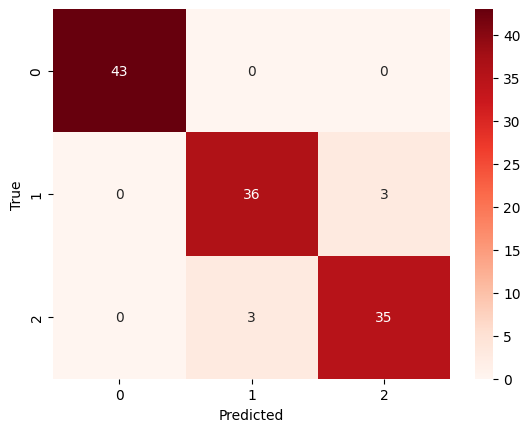

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###  Useing Dimensionality reduction techniques like PCA (Principal Component Analysis) to visualize high-dimensional data

In [30]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [32]:
digits = load_digits()
X, y = digits.data, digits.target

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

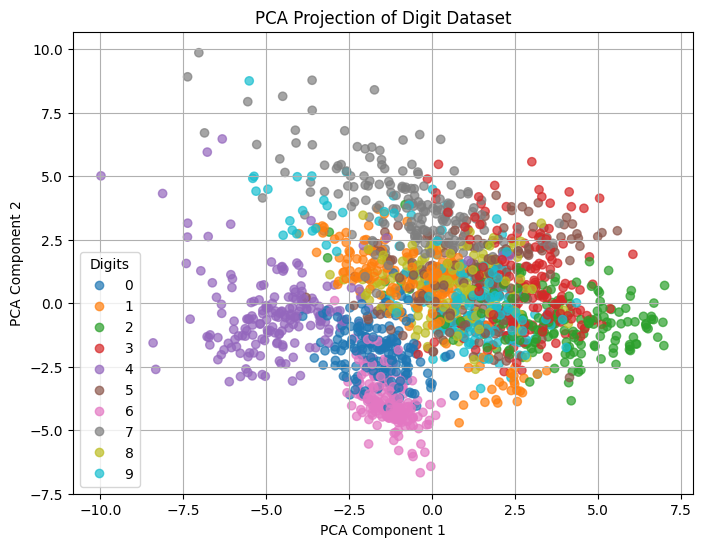

In [35]:
# Visualize 2D projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Digit Dataset")
plt.grid(True)
plt.show()

In [36]:
# Split data and train a classifier using reduced dimensions
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy with PCA-reduced features: {accuracy:.2f}")

Model accuracy with PCA-reduced features: 0.54
